In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('./monthlyAvg.csv')
data['TIME'] = pd.to_datetime(data['TIME'])
data.sort_values(by=['TIME'], inplace=True)
data.set_index('TIME', inplace=True)

In [16]:
data.head()
data.drop(['BIKE STANDS','AVAILABLE BIKE STANDS','AVAILABLE BIKES'], axis=1, inplace=True)

In [17]:
data['MONTH'] = data.index.month
# data['YEAR'] = data.index.year
data['WEEK DAY'] = data.index.weekday
# data['DAY']= data.index.day

In [18]:
pre_covid_date = pd.to_datetime('2020-03-27')
post_covid_date = pd.to_datetime('2022-01-21')

In [25]:
data.columns

Index(['BIKE USAGE', 'AVG BIKE USAGE', 'MONTH', 'WEEK DAY'], dtype='object')

In [19]:
#variable x which is all the data before the covid date excluding the bike usage column (features)
X = data.loc[data.index < pre_covid_date].drop('BIKE USAGE', axis=1)
X_COVID = data.loc[data.index >= pre_covid_date].drop('BIKE USAGE', axis=1)
#variable y which is the bike usage column before the covid date (target)
# y = data.loc[data.index < pre_covid_date].drop(['MONTH','YEAR','WEEK DAY','DAY'], axis=1)
y = data.loc[data.index < pre_covid_date].drop(['MONTH','WEEK DAY'], axis=1)

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [22]:
# finding the optimal alpha value for the ridge regression model
ridge = Ridge()
alpha_values = {'alpha': np.linspace(1000,10000,100)}
ridge_regressor = GridSearchCV(ridge, alpha_values, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, Y_train)
print(ridge_regressor.best_estimator_)
# best alpha found is 6.5  25.3

Ridge(alpha=10000.0)


In [23]:
# training ridge regression model with alpha of 153
model = Ridge(alpha=100)
model.fit(X_train, Y_train)

Ridge(alpha=100)

In [24]:
model.coef_

array([[ 5.70455795e+01,  9.42946238e+01, -2.68942156e+02],
       [ 9.99160865e-01,  1.73949216e-05, -1.13748467e-03]])

Mean Squared Error: 162852.6631226939


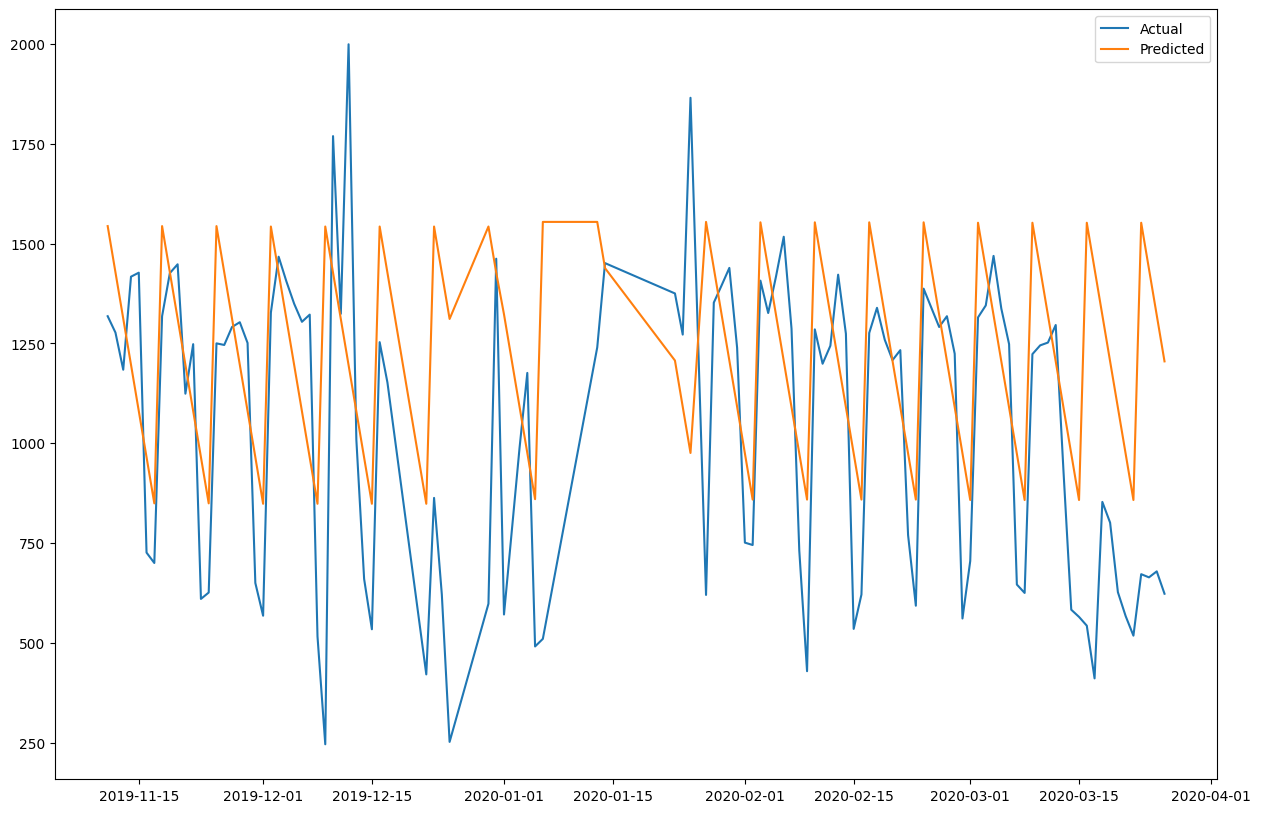

In [13]:
# evaluation the model using the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# plotting the predicted values against the actual values with the timestamp as the x axis
plt.figure(figsize=(15,10))
plt.plot(Y_test.index, Y_test, label='Actual')
plt.plot(Y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()

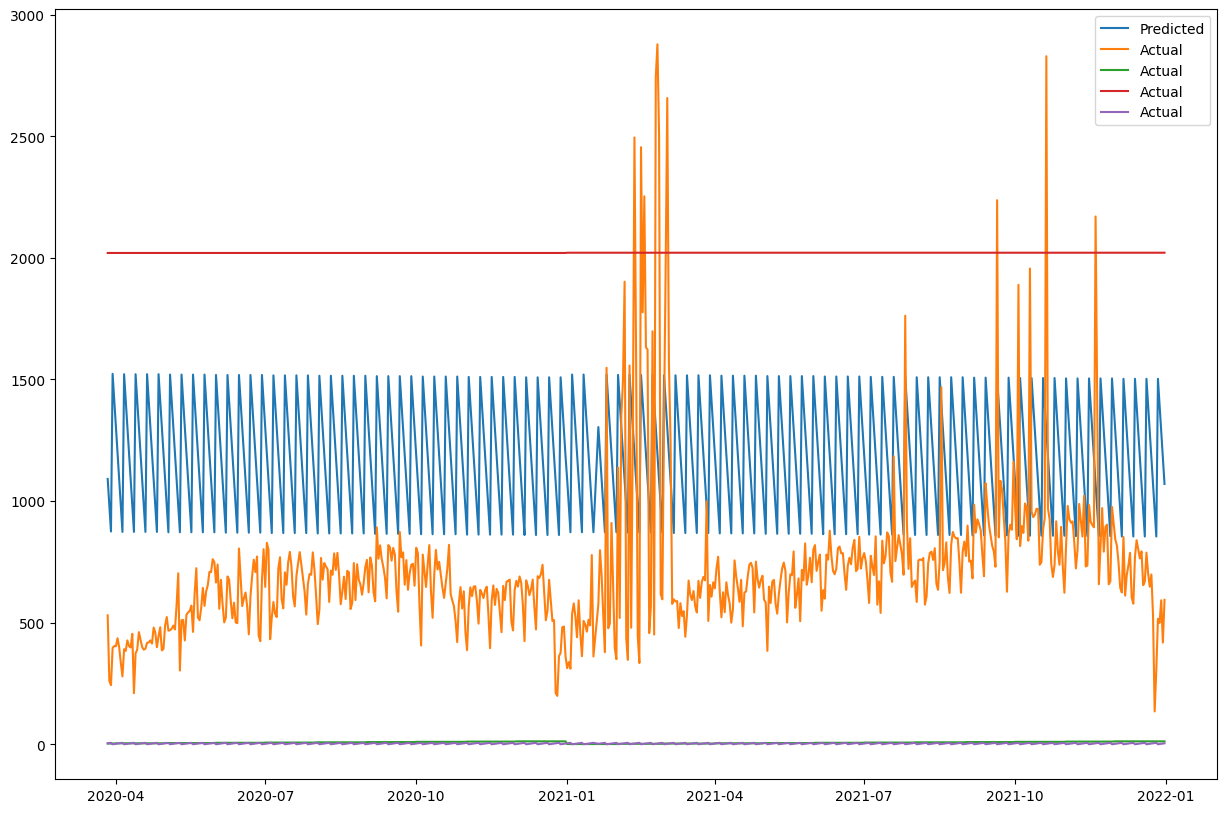

In [109]:
# evaulating the model using the covid data
usage_pred = model.predict(X_COVID)
usage_actual = data.loc[data.index >= pre_covid_date]


# plotting predicted values against actual values with the timestamp as the x axis
plt.figure(figsize=(15,10))
plt.plot(X_COVID.index, y_pred, label='Predicted')
plt.plot(X_COVID.index, usage_actual, label='Actual')
plt.legend()
plt.show()
